In [13]:
import numpy as np
import random
import os
import gc
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Fixed Seed

In [14]:
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

In [16]:
unlabel_train = pd.read_csv('c:/data/self/unlabel_train.csv', index_col=0) # 미리 전처리한 데이터
label_train = pd.read_csv('c:/data/self/label_train.csv', index_col=0) # 미리 전처리한 데이터

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

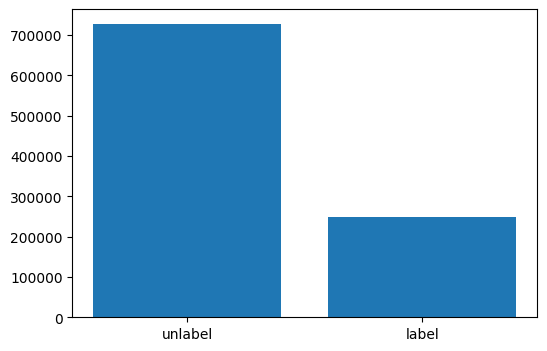

In [17]:
plt.figure(figsize=(6,4))
plt.bar(['unlabel', 'label'], [len(unlabel_train), len(label_train)])
plt.show()

In [19]:
label_train_x = label_train.drop(columns=['ID', 'Delay','Tail_Number']) # 필요없는 칼럼 제거
label_train_y = label_train['Delay'] # Delay 값이 target

In [23]:
test = pd.read_csv('c:/data/self/treated_test.csv', index_col=0) # 제출해야할 test 데이터

In [24]:
test.head()

,ID,Origin_Airport_ID,Destination_Airport_ID,Distance,Carrier_ID(DOT),Tail_Number,Day,EDT,EAT
0,TEST_000000,12266,14683,1,19977,N79402,351,23,25
1,TEST_000001,11618,10397,7,19790,N3765,256,30,34
2,TEST_000002,13930,12953,7,19977,N413UA,66,32,38
3,TEST_000003,13796,12892,3,19393,N905WN,139,38,41
4,TEST_000004,11697,12892,23,20409,N945JT,189,38,43


In [25]:
test_x = test.drop(columns=['ID', 'Tail_Number']) # 필요없는 칼럼 제거

In [26]:
label_train_y.value_counts()

Delay
Not_Delayed    205036
Delayed         43985
Name: count, dtype: int64

In [27]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.ensemble import RandomForestClassifier

In [28]:
stclf = SelfTrainingClassifier(
    base_estimator = RandomForestClassifier(n_estimators = 100),
    threshold = 0.9,
    verbose = True)
stclf.fit(label_train_x, label_train_y) # label데이터로 학습

c:\Users\user\miniconda3\envs\py\Lib\site-packages\sklearn\semi_supervised\_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


SelfTrainingClassifier(base_estimator=RandomForestClassifier(), threshold=0.9,
                       verbose=True)

In [29]:
stclf.score(label_train_x, label_train_y)

0.9996144903441878

In [30]:
unlabel_train_x = unlabel_train.drop(columns=['ID', 'Delay','Tail_Number'])
unlabel_train_y = unlabel_train['Delay']

In [31]:
preds = stclf.predict(unlabel_train_x)

In [33]:
preds

array(['Not_Delayed', 'Not_Delayed', 'Not_Delayed', ..., 'Not_Delayed',
       'Not_Delayed', 'Not_Delayed'], dtype=object)

In [34]:
train_x_self = pd.concat([label_train_x, unlabel_train_x]) # 새롭게 라벨링된 데이터 + 기존 데이터
train_y_self = pd.concat([label_train_y, pd.Series(preds)]) # 새롭게 라벨링된 데이터 + 기존 데이터

In [35]:
rf_self = RandomForestClassifier(n_estimators = 100)
rf_self.fit(train_x_self, train_y_self)

RandomForestClassifier()

In [36]:
rf_self.score(train_x_self, train_y_self)

0.9998894085096056

In [37]:
preds_self = rf_self.predict(test_x) # 제출해야할 데이터

In [38]:
preds_self_pd = pd.DataFrame(preds_self)
delayed_status = preds_self_pd.value_counts()
delayed_status

Not_Delayed    935645
Delayed         64355
Name: count, dtype: int64

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

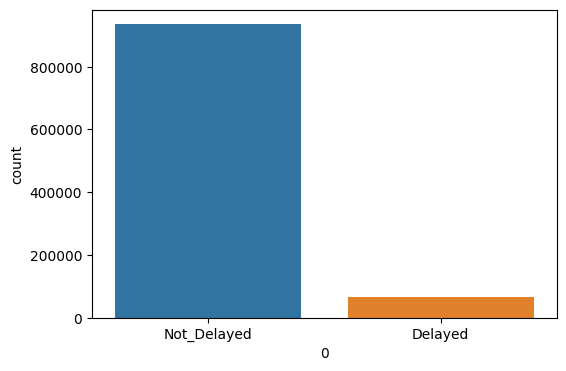

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x=0, data=preds_self_pd)
plt.show()